# Principal Component Analysis

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
%matplotlib inline

In [3]:
breast_cancer = pd.read_csv('breast-cancer.csv', header=None)
breast_cancer

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,119513,N,31,18.02,27.60,117.50,1013.0,0.09489,0.10360,0.10860,...,139.70,1436.0,0.11950,0.1926,0.3140,0.11700,0.2677,0.08113,5.0,5
1,8423,N,61,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,...,184.60,2019.0,0.16220,0.6656,0.7119,0.26540,0.4601,0.11890,3.0,2
2,842517,N,116,21.37,17.44,137.50,1373.0,0.08836,0.11890,0.12550,...,159.10,1949.0,0.11880,0.3449,0.3414,0.20320,0.4334,0.09067,2.5,0
3,843483,N,123,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,...,98.87,567.7,0.20980,0.8663,0.6869,0.25750,0.6638,0.17300,2.0,0
4,843584,R,27,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,...,152.20,1575.0,0.13740,0.2050,0.4000,0.16250,0.2364,0.07678,3.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,942640,N,10,22.52,21.92,146.90,1597.0,0.07592,0.09162,0.06862,...,162.10,1902.0,0.08191,0.1319,0.1056,0.09378,0.2061,0.05788,6.0,2
194,943471,N,8,15.44,31.18,101.00,740.4,0.09399,0.10620,0.13750,...,112.60,929.0,0.12720,0.2362,0.2975,0.12860,0.2914,0.08024,1.5,0
195,94547,N,12,17.17,29.19,110.00,915.3,0.08952,0.06655,0.06583,...,132.50,1295.0,0.12610,0.1572,0.2141,0.09520,0.3362,0.06033,3.7,0
196,947204,R,3,21.42,22.84,145.00,1440.0,0.10700,0.19390,0.23800,...,198.30,2375.0,0.14980,0.4379,0.5411,0.22150,0.2832,0.08981,3.0,?


In [4]:
total_cols = ['id', 'outcome', 'time', 'cell_1_radius', 'cell_1_texture', 'cell_1_perimiter',
              'cell_1_area', 'cell_1_smoothness', 'cell_1_compactness', 'cell_1_concavity',
              'cell_1_concave_points', 'cell_1_symmetry', 'cell_1_fractal_dimension',
              'cell_2_radius', 'cell_2_texture', 'cell_2_perimiter', 'cell_2_area',
              'cell_2_smoothness', 'cell_2_compactness', 'cell_2_concavity',
              'cell_2_concave_points', 'cell_2_symmetry', 'cell_2_fractal_dimension', 'cell_3_radius', 
              'cell_3_texture', 'cell_3_perimiter', 'cell_3_area', 'cell_3_smoothness',
              'cell_3_compactness', 'cell_3_concavity', 'cell_3_concave_points', 'cell_3_symmetry',
              'cell_3_fractal_dimension', 'tumor_size', 'lymph_status']

breast_cancer.columns = total_cols

In [5]:
numerics = breast_cancer._get_numeric_data()
numerics.head()

,id,time,cell_1_radius,cell_1_texture,cell_1_perimiter,cell_1_area,cell_1_smoothness,cell_1_compactness,cell_1_concavity,cell_1_concave_points,...,cell_3_texture,cell_3_perimiter,cell_3_area,cell_3_smoothness,cell_3_compactness,cell_3_concavity,cell_3_concave_points,cell_3_symmetry,cell_3_fractal_dimension,tumor_size
0,119513,31,18.02,27.60,117.50,1013.0,0.09489,0.1036,0.1086,0.07055,...,37.08,139.70,1436.0,0.1195,0.1926,0.3140,0.1170,0.2677,0.08113,5.0
1,8423,61,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3.0
2,842517,116,21.37,17.44,137.50,1373.0,0.08836,0.1189,0.1255,0.08180,...,20.98,159.10,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5
3,843483,123,11.42,20.38,77.58,386.1,0.14250,0.2839,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2.0
4,843584,27,20.29,14.34,135.10,1297.0,0.10030,0.1328,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5


In [6]:
numerics = numerics.drop(['id', 'time'], axis=1)

In [7]:
breast_cancer

,id,outcome,time,cell_1_radius,cell_1_texture,cell_1_perimiter,cell_1_area,cell_1_smoothness,cell_1_compactness,cell_1_concavity,...,cell_3_perimiter,cell_3_area,cell_3_smoothness,cell_3_compactness,cell_3_concavity,cell_3_concave_points,cell_3_symmetry,cell_3_fractal_dimension,tumor_size,lymph_status
0,119513,N,31,18.02,27.60,117.50,1013.0,0.09489,0.10360,0.10860,...,139.70,1436.0,0.11950,0.1926,0.3140,0.11700,0.2677,0.08113,5.0,5
1,8423,N,61,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,...,184.60,2019.0,0.16220,0.6656,0.7119,0.26540,0.4601,0.11890,3.0,2
2,842517,N,116,21.37,17.44,137.50,1373.0,0.08836,0.11890,0.12550,...,159.10,1949.0,0.11880,0.3449,0.3414,0.20320,0.4334,0.09067,2.5,0
3,843483,N,123,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,...,98.87,567.7,0.20980,0.8663,0.6869,0.25750,0.6638,0.17300,2.0,0
4,843584,R,27,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,...,152.20,1575.0,0.13740,0.2050,0.4000,0.16250,0.2364,0.07678,3.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,942640,N,10,22.52,21.92,146.90,1597.0,0.07592,0.09162,0.06862,...,162.10,1902.0,0.08191,0.1319,0.1056,0.09378,0.2061,0.05788,6.0,2
194,943471,N,8,15.44,31.18,101.00,740.4,0.09399,0.10620,0.13750,...,112.60,929.0,0.12720,0.2362,0.2975,0.12860,0.2914,0.08024,1.5,0
195,94547,N,12,17.17,29.19,110.00,915.3,0.08952,0.06655,0.06583,...,132.50,1295.0,0.12610,0.1572,0.2141,0.09520,0.3362,0.06033,3.7,0
196,947204,R,3,21.42,22.84,145.00,1440.0,0.10700,0.19390,0.23800,...,198.30,2375.0,0.14980,0.4379,0.5411,0.22150,0.2832,0.08981,3.0,?


#### Quick overview on the target variable

Text(0.5, 1.0, 'results')

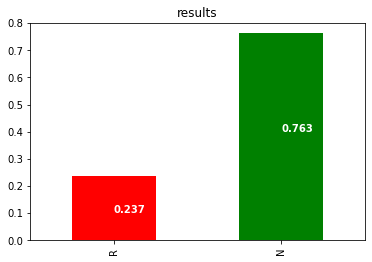

In [8]:
breast_cancer['outcome'].value_counts(normalize=True, sort=True, ascending=True).plot.bar(color=['Red', 'Green'])

R = breast_cancer['outcome'].value_counts(normalize=True).round(3)['R']
N = breast_cancer['outcome'].value_counts(normalize=True).round(3)['N']

plt.annotate(R, xy=(0,0.1),color='White', weight='bold')
plt.annotate(N, xy=(1,0.4),color='White', weight='bold')
plt.title('results')

In [9]:
numerics = breast_cancer.select_dtypes('number')
numerics

,id,time,cell_1_radius,cell_1_texture,cell_1_perimiter,cell_1_area,cell_1_smoothness,cell_1_compactness,cell_1_concavity,cell_1_concave_points,...,cell_3_texture,cell_3_perimiter,cell_3_area,cell_3_smoothness,cell_3_compactness,cell_3_concavity,cell_3_concave_points,cell_3_symmetry,cell_3_fractal_dimension,tumor_size
0,119513,31,18.02,27.60,117.50,1013.0,0.09489,0.10360,0.10860,0.07055,...,37.08,139.70,1436.0,0.11950,0.1926,0.3140,0.11700,0.2677,0.08113,5.0
1,8423,61,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.6656,0.7119,0.26540,0.4601,0.11890,3.0
2,842517,116,21.37,17.44,137.50,1373.0,0.08836,0.11890,0.12550,0.08180,...,20.98,159.10,1949.0,0.11880,0.3449,0.3414,0.20320,0.4334,0.09067,2.5
3,843483,123,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.8663,0.6869,0.25750,0.6638,0.17300,2.0
4,843584,27,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.2050,0.4000,0.16250,0.2364,0.07678,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,942640,10,22.52,21.92,146.90,1597.0,0.07592,0.09162,0.06862,0.06367,...,24.81,162.10,1902.0,0.08191,0.1319,0.1056,0.09378,0.2061,0.05788,6.0
194,943471,8,15.44,31.18,101.00,740.4,0.09399,0.10620,0.13750,0.06500,...,41.48,112.60,929.0,0.12720,0.2362,0.2975,0.12860,0.2914,0.08024,1.5
195,94547,12,17.17,29.19,110.00,915.3,0.08952,0.06655,0.06583,0.05068,...,36.66,132.50,1295.0,0.12610,0.1572,0.2141,0.09520,0.3362,0.06033,3.7
196,947204,3,21.42,22.84,145.00,1440.0,0.10700,0.19390,0.23800,0.13180,...,27.98,198.30,2375.0,0.14980,0.4379,0.5411,0.22150,0.2832,0.08981,3.0


## X/y Split

In [10]:
X = numerics.drop(['id', 'time'], axis=1)
y = breast_cancer['outcome']

### Train-test Split and Scaling

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=55)

scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Principal Component Analysis

In [23]:
pca = PCA(svd_solver='full')

pca.fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

columns = ['PCA_' + str(i) for i in list(range(1, len(X.columns) + 1))]

X_train_pca = pd.DataFrame(X_train_pca, columns=columns)
X_test_pca = pd.DataFrame(X_test_pca, columns=columns)

#X_train_pca.head()
#X_test_pca.head()

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,PCA_10,...,PCA_22,PCA_23,PCA_24,PCA_25,PCA_26,PCA_27,PCA_28,PCA_29,PCA_30,PCA_31
0,-3.760919,-2.623848,-2.280976,-0.820554,0.685570,1.468255,0.088128,1.039484,-0.005857,-0.135730,...,0.065196,-0.193059,-0.056267,-0.151831,0.057729,-0.060340,0.023562,0.011156,0.007607,0.010415
1,1.112111,-0.701340,-1.337029,1.638481,-0.813728,-0.139722,0.634482,-0.907838,0.990952,-0.085103,...,0.027456,0.068312,0.133826,-0.099408,0.065991,0.076931,-0.047695,0.029207,0.061056,0.030571
2,4.024013,-3.583385,-2.046122,-0.617062,-0.774066,0.216121,-0.241839,-0.383815,-1.076845,0.242149,...,-0.364759,-0.095917,0.097964,0.097160,0.024887,0.083591,0.068119,0.153875,-0.010121,0.037477
3,1.729502,-1.261877,0.319584,0.418194,2.036033,-1.240481,1.882835,0.099225,-0.549190,-0.135530,...,-0.261951,0.112596,-0.194385,0.170337,0.130352,0.052375,-0.010501,0.034011,0.006939,-0.002068
4,3.756672,0.617309,-3.241637,-0.252097,0.787550,-1.723566,2.697565,-0.025948,0.324576,0.357053,...,0.062586,0.127153,0.064644,0.057433,0.065545,0.198579,-0.034178,-0.034383,0.068885,-0.031202


In [30]:
results = pca.explained_variance_ratio_
total_variance = pca.explained_variance_ratio_.cumsum()

scree_df = pd.DataFrame({'features_kept': range(1,len(results)+1),
                         'covered_variance': results,
                         'total_variance': total_variance})
scree_df

,features_kept,covered_variance,total_variance
0,1,0.327019,0.327019
1,2,0.263381,0.590400
2,3,0.103828,0.694228
3,4,0.073665,0.767894
4,5,0.044153,0.812047
5,6,0.040454,0.852500
6,7,0.030244,0.882744
7,8,0.028454,0.911198
8,9,0.019422,0.930620
9,10,0.014825,0.945446


<Figure size 1440x432 with 0 Axes>

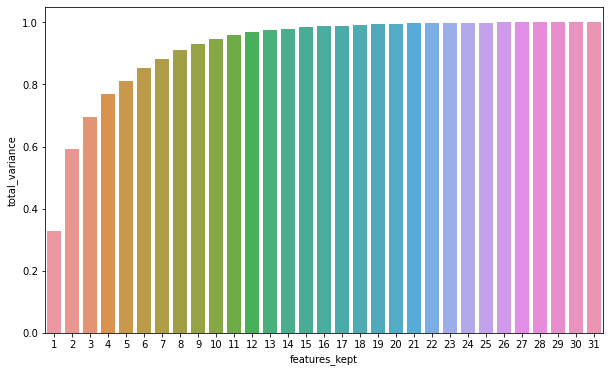

<Figure size 1440x432 with 0 Axes>

In [58]:
#colors = ['blue' if x > total_variance[x] else 'lightblue' for x in total_variance]
plt.figure(figsize=(10,6))
sns.barplot(x='features_kept', y='total_variance', data=scree_df)

plt.figure(figsize=(20,6))


#### 